<a href="https://colab.research.google.com/github/micha-blip/Life-Science-Repository-Berlin-Brandenburg/blob/main/Life_science_repository.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keybert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import HDBSCAN
from sentence_transformers import SentenceTransformer
import plotly.graph_objects as go
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from keybert import KeyBERT
from tqdm import tqdm

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [234]:
comp = pd.read_excel("/content/drive/MyDrive/Life Sciences Directory Berlin-Brandenburg.xlsx")

In [527]:
comp = comp[comp.Description != 'No description provided.']
comp = comp[comp.Description != 'A company (website not fully provided).']



In [528]:
comp

Category  \
0                Pharmaceutical Companies   
1                Pharmaceutical Companies   
2                Pharmaceutical Companies   
3                Pharmaceutical Companies   
4                Pharmaceutical Companies   
..                                    ...   
722  Medtech and Digital Health Companies   
723  Medtech and Digital Health Companies   
724  Medtech and Digital Health Companies   
725  Medtech and Digital Health Companies   
726  Medtech and Digital Health Companies   

                                    Name  \
0        AbbVie Deutschland GmbH & Co KG   
1    Advance Pharma GmbH (Aristo Pharma)   
2                     Aristo Pharma GmbH   
3                            AstraZeneca   
4            B. Braun Melsungen – Pharma   
..                                   ...   
722                          YUVEDO GmbH   
723        Zapfe Orthopädie-Technik GmbH   
724              Zenicor Medical Systems   
725           ZenZen Diabetes Support UG   
726                          ZeoSys GmbH   

                                           Description  \
0    AbbVie is a global, research-driven biopharmac...   
1    Advance Pharma specializes in advanced pharmac...   
2    A fast-growing pharmaceutical company with ope...   
3    A global innovation-driven biopharmaceutical c...   
4    B. Braun Melsungen operates a competence centr...   
..                                                 ...   
722  Develops solutions for people with Parkinson's...   
723  Manufactures and adapts prostheses and orthose...   
724  Develops Zenicor-ECG, a remote cardiology diag...   
725  Provides support services for diabetes managem...   
726  Focuses on the research and development of the...   

                                 Link         Unnamed: 4  \
0               https://www.abbvie.de                NaN   
1    https://www.advance-pharma.de/de                NaN   
2     https://www.aristo-pharma.de/de                NaN   
3         https://www.astrazeneca.com                NaN   
4               https://www.bbraun.de                NaN   
..                                ...                ...   
722             https://www.yuvedo.de          yuvedo.de   
723              https://www.zapfe.de           zapfe.de   
724            https://www.zenicor.de         zenicor.de   
725             https://www.zenzen.de          zenzen.de   
726     https://www.zeosys-medical.de  zeosys-medical.de   

                                         Unnamed: 5 Hex_color  DBSCAN  \
0                                               NaN   #f77189       1   
1                                               NaN   #f77189      -1   
2                                               NaN   #f77189       0   
3                                               NaN   #f77189       1   
4                                               NaN   #f77189       2   
..                                              ...       ...     ...   
722                  https://www.yuvedo.deyuvedo.de   #cc7af4      -1   
723                    https://www.zapfe.dezapfe.de   #cc7af4      34   
724                https://www.zenicor.dezenicor.de   #cc7af4      -1   
725                  https://www.zenzen.dezenzen.de   #cc7af4      42   
726  https://www.zeosys-medical.dezeosys-medical.de   #cc7af4      31   

                       keyword  
0    biopharmaceutical company  
1                               
2     specialty pharmaceutical  
3    biopharmaceutical company  
4               berlin sterile  
..                         ...  
722                             
723      prosthetics orthotics  
724                             
725         healthcare digital  
726       manufactures medical  

[679 rows x 9 columns]

In [529]:
text = list(comp.Description)

Generate embeddings with SentenceTransformer

In [530]:
# Load a pre-trained sentence transformer model
model = SentenceTransformer('all-mpnet-base-v2')

# Generate embeddings for the sentences
embeddings = model.encode(text)

In [531]:
np.save("/content/drive/MyDrive/embeddings_bionnale/all-mpnet-base-v2.npy", embeddings)

In [532]:
model = SentenceTransformer("all-MiniLM-L6-v2", )
# Generate embeddings for the sentences
embeddings_2 = model.encode(text)

In [533]:
np.save("/content/drive/MyDrive/embeddings_bionnale/all-MiniLM-L6-v2.npy", embeddings_2)

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 679 samples in 0.002s...
[t-SNE] Computed neighbors for 679 samples in 0.032s...
[t-SNE] Computed conditional probabilities for sample 679 / 679
[t-SNE] Mean sigma: 0.098975
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.444603
[t-SNE] KL divergence after 1000 iterations: 1.314146
[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 679 samples in 0.001s...
[t-SNE] Computed neighbors for 679 samples in 0.042s...
[t-SNE] Computed conditional probabilities for sample 679 / 679
[t-SNE] Mean sigma: 0.169095
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.939056
[t-SNE] KL divergence after 1000 iterations: 1.281458
[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 679 samples in 0.001s...
[t-SNE] Computed neighbors for 679 samples in 0.545s...
[t-SNE] Computed conditional probabilities for sample 679 / 679
[t-SNE] Mean sigma: 3.610237
[t-SNE] KL divergence after 250 iteratio

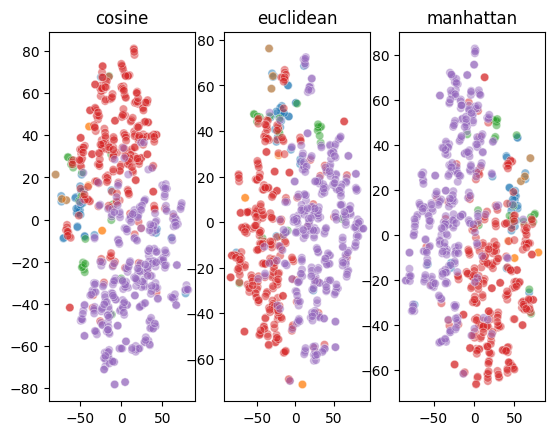

In [534]:
# Apply t-SNE to the data

for i,j in enumerate(["cosine", "euclidean", "manhattan"]):
  tsne = TSNE(n_components=2, random_state=42,  metric=j, verbose = 1, perplexity=3)
  X_tsne = tsne.fit_transform(embeddings)
  plt.subplot(1,3,i+1 )
  sns.scatterplot(x = X_tsne[:, 0], y = X_tsne[:, 1], hue = [str(x) for x in comp.Category], alpha = 0.5)
  plt.legend('',frameon=False)
  plt.title(j)


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 679 samples in 0.001s...
[t-SNE] Computed neighbors for 679 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 679 / 679
[t-SNE] Mean sigma: 0.151106
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.988434
[t-SNE] KL divergence after 1000 iterations: 1.429298
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 679 samples in 0.001s...
[t-SNE] Computed neighbors for 679 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 679 / 679
[t-SNE] Mean sigma: 0.224810
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.980507
[t-SNE] KL divergence after 1000 iterations: 1.422892
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 679 samples in 0.001s...
[t-SNE] Computed neighbors for 679 samples in 0.274s...
[t-SNE] Computed conditional probabilities for sample 679 / 679
[t-SNE] Mean sigma: 3.497785
[t-SNE] KL divergence after 250 iteratio

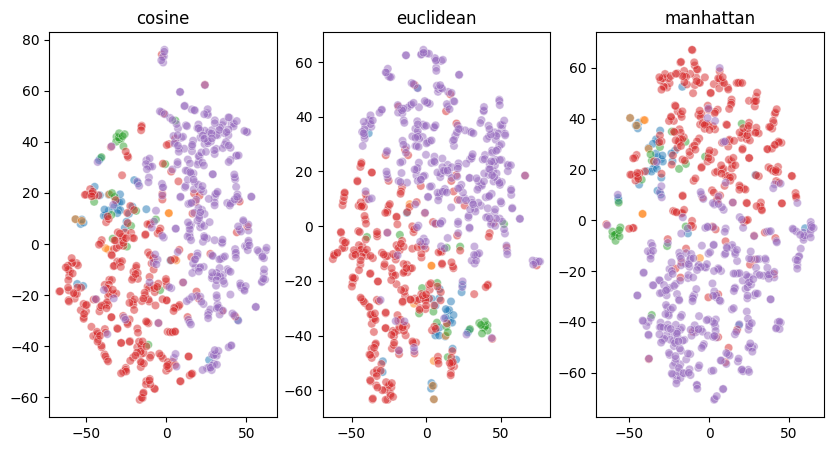

In [535]:
# Apply t-SNE to the data
#all-MiniLM-L6-v2

plt.figure(figsize = (10,5))
for i,j in enumerate(["cosine", "euclidean", "manhattan"]):
  tsne = TSNE(n_components=2, random_state=42,  metric=j, verbose = 1, init = "random",  perplexity = 5)
  X_tsne = tsne.fit_transform(embeddings_2)
  plt.subplot(1,3,i+1 )
  sns.scatterplot(x = X_tsne[:, 0], y = X_tsne[:, 1], hue = [str(x) for x in comp.Category], alpha = 0.5)
  plt.legend('',frameon=False)
  plt.title(j)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 679 samples in 0.001s...
[t-SNE] Computed neighbors for 679 samples in 0.064s...
[t-SNE] Computed conditional probabilities for sample 679 / 679
[t-SNE] Mean sigma: 0.139438
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.102425
[t-SNE] KL divergence after 1000 iterations: 1.373840
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 679 samples in 0.001s...
[t-SNE] Computed neighbors for 679 samples in 0.045s...
[t-SNE] Computed conditional probabilities for sample 679 / 679
[t-SNE] Mean sigma: 0.305535
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.859871
[t-SNE] KL divergence after 1000 iterations: 1.362481
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 679 samples in 0.001s...
[t-SNE] Computed neighbors for 679 samples in 0.817s...
[t-SNE] Computed conditional probabilities for sample 679 / 679
[t-SNE] Mean sigma: 8.060899
[t-SNE] KL divergence after 250 iteratio

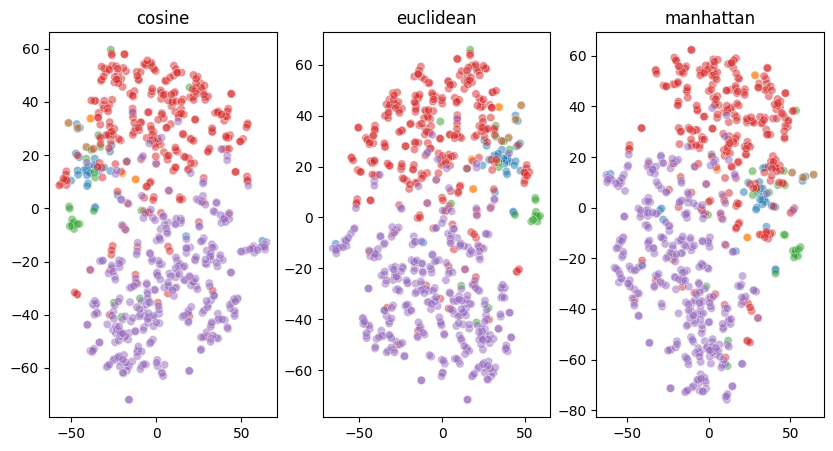

In [536]:
# Apply t-SNE to the data
#all-MiniLM-L6-v2 + 'all-mpnet-base-v2'

emb_3 = np.concatenate([embeddings, embeddings_2], axis = 1)

plt.figure(figsize = (10,5))
for i,j in enumerate(["cosine", "euclidean", "manhattan"]):
  tsne = TSNE(n_components=2, random_state=42,  metric=j, verbose = 1, init = "random",  perplexity = 5)
  X_tsne = tsne.fit_transform(emb_3)
  plt.subplot(1,3,i+1 )
  sns.scatterplot(x = X_tsne[:, 0], y = X_tsne[:, 1], hue = [str(x) for x in comp.Category], alpha = 0.5)
  plt.legend('',frameon=False)
  plt.title(j)


In [537]:
palette = sns.color_palette('husl', n_colors=len(comp.Category.unique()))
hex_col = palette.as_hex()
color = [hex_col[i] for i in comp.Category.factorize()[0]]
comp['Hex_color'] = color

In [538]:
comp

Category  \
0                Pharmaceutical Companies   
1                Pharmaceutical Companies   
2                Pharmaceutical Companies   
3                Pharmaceutical Companies   
4                Pharmaceutical Companies   
..                                    ...   
722  Medtech and Digital Health Companies   
723  Medtech and Digital Health Companies   
724  Medtech and Digital Health Companies   
725  Medtech and Digital Health Companies   
726  Medtech and Digital Health Companies   

                                    Name  \
0        AbbVie Deutschland GmbH & Co KG   
1    Advance Pharma GmbH (Aristo Pharma)   
2                     Aristo Pharma GmbH   
3                            AstraZeneca   
4            B. Braun Melsungen – Pharma   
..                                   ...   
722                          YUVEDO GmbH   
723        Zapfe Orthopädie-Technik GmbH   
724              Zenicor Medical Systems   
725           ZenZen Diabetes Support UG   
726                          ZeoSys GmbH   

                                           Description  \
0    AbbVie is a global, research-driven biopharmac...   
1    Advance Pharma specializes in advanced pharmac...   
2    A fast-growing pharmaceutical company with ope...   
3    A global innovation-driven biopharmaceutical c...   
4    B. Braun Melsungen operates a competence centr...   
..                                                 ...   
722  Develops solutions for people with Parkinson's...   
723  Manufactures and adapts prostheses and orthose...   
724  Develops Zenicor-ECG, a remote cardiology diag...   
725  Provides support services for diabetes managem...   
726  Focuses on the research and development of the...   

                                 Link         Unnamed: 4  \
0               https://www.abbvie.de                NaN   
1    https://www.advance-pharma.de/de                NaN   
2     https://www.aristo-pharma.de/de                NaN   
3         https://www.astrazeneca.com                NaN   
4               https://www.bbraun.de                NaN   
..                                ...                ...   
722             https://www.yuvedo.de          yuvedo.de   
723              https://www.zapfe.de           zapfe.de   
724            https://www.zenicor.de         zenicor.de   
725             https://www.zenzen.de          zenzen.de   
726     https://www.zeosys-medical.de  zeosys-medical.de   

                                         Unnamed: 5 Hex_color  DBSCAN  \
0                                               NaN   #f77189       1   
1                                               NaN   #f77189      -1   
2                                               NaN   #f77189       0   
3                                               NaN   #f77189       1   
4                                               NaN   #f77189       2   
..                                              ...       ...     ...   
722                  https://www.yuvedo.deyuvedo.de   #cc7af4      -1   
723                    https://www.zapfe.dezapfe.de   #cc7af4      34   
724                https://www.zenicor.dezenicor.de   #cc7af4      -1   
725                  https://www.zenzen.dezenzen.de   #cc7af4      42   
726  https://www.zeosys-medical.dezeosys-medical.de   #cc7af4      31   

                       keyword  
0    biopharmaceutical company  
1                               
2     specialty pharmaceutical  
3    biopharmaceutical company  
4               berlin sterile  
..                         ...  
722                             
723      prosthetics orthotics  
724                             
725         healthcare digital  
726       manufactures medical  

[679 rows x 9 columns]

In [555]:
tsne = TSNE(n_components=2, random_state=42,  metric="cosine", verbose = 1, init = "random",  perplexity = 3, max_iter=5000)
X_tsne = tsne.fit_transform(emb_3)

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 679 samples in 0.007s...
[t-SNE] Computed neighbors for 679 samples in 0.051s...
[t-SNE] Computed conditional probabilities for sample 679 / 679
[t-SNE] Mean sigma: 0.112153
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.603096
[t-SNE] KL divergence after 5000 iterations: 1.229362


In [556]:
from sklearn.cluster import DBSCAN

<Axes: >

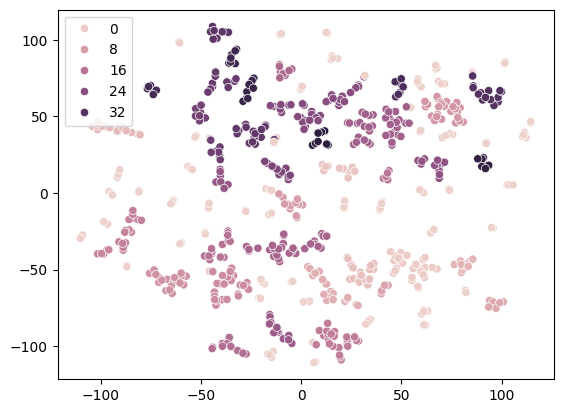

In [578]:
clust = DBSCAN(eps = 7)
clust.fit_predict(X = X_tsne)
sns.scatterplot(x = X_tsne[:, 0], y = X_tsne[:, 1], hue = clust.labels_)

In [579]:
comp['DBSCAN'] = clust.labels_

In [580]:
from keybert import KeyBERT

kw_model = KeyBERT()
# Assuming 'comp' DataFrame has the cluster labels in the 'DBSCAN' column
# And the original text is in the 'Description' column
clustered_texts = comp.groupby('DBSCAN')['Description'].apply(list)

keyword_dict = {"cluster" : "keyword"}

for cluster_label, sentences in clustered_texts.items():
    if cluster_label != -1: # Exclude noise cluster
        print(f"Cluster {cluster_label}:")
        # Join sentences for KeyBERT, or pass the list directly depending on KeyBERT version
        cluster_text = " ".join(sentences)
        keywords = kw_model.extract_keywords(cluster_text, keyphrase_ngram_range=(1, 2), stop_words='english')
        keyword_dict[cluster_label] = keywords[0]


Cluster 0:
Cluster 1:
Cluster 2:
Cluster 3:
Cluster 4:
Cluster 5:
Cluster 6:
Cluster 7:
Cluster 8:
Cluster 9:
Cluster 10:
Cluster 11:
Cluster 12:
Cluster 13:
Cluster 14:
Cluster 15:
Cluster 16:
Cluster 17:
Cluster 18:
Cluster 19:
Cluster 20:
Cluster 21:
Cluster 22:
Cluster 23:
Cluster 24:
Cluster 25:
Cluster 26:
Cluster 27:
Cluster 28:
Cluster 29:
Cluster 30:
Cluster 31:
Cluster 32:
Cluster 33:
Cluster 34:
Cluster 35:
Cluster 36:
Cluster 37:
Cluster 38:


In [581]:
keyword = []

for x in comp.DBSCAN:
  if x == -1:
    keyword.append(" ")
  else:
    keyword.append(keyword_dict[x][0])


In [582]:
comp['keyword'] = keyword


In [585]:
import plotly.graph_objects as go
from scipy.spatial import ConvexHull

def plot_emb(X, comp):
  f = go.FigureWidget()


    # Now add polygons for each cluster
  for cluster_label in comp['DBSCAN'].unique():
      if cluster_label != -1: # Exclude noise cluster
          cluster_points = X[comp['DBSCAN'] == cluster_label]

          # Need at least 3 points to form a polygon
          if len(cluster_points) >= 3:
              # Calculate the convex hull of the cluster points
              # This finds the smallest convex polygon that contains all points in the cluster
              try:
                  hull = ConvexHull(cluster_points)
                  hull_points = cluster_points[hull.vertices]

                  # Close the polygon by repeating the first point at the end
                  polygon_x = np.append(hull_points[:, 0], hull_points[0, 0])
                  polygon_y = np.append(hull_points[:, 1], hull_points[0, 1])

                  centroid_x = np.mean(cluster_points[:, 0])
                  centroid_y = np.mean(cluster_points[:, 1])
                  keyword = keyword_dict.get(cluster_label, ["No keyword"])[0] # Handle cases where cluster_label might not be in keyword_dict
                  f.add_trace(go.Scatter(
                      x=[centroid_x],
                      y=[centroid_y],
                      mode='text',
                      text=[keyword],
                      textposition="middle center",
                      textfont=dict(
                          family="Roboto",
                          size=15,
                          color="black" # Adjust text color as needed
                      ),
                      showlegend=False, # Don't show text annotations in the legend
                      visible=True # Initially hidden
                  ))



                  # Get the color for this cluster (assuming consistent color within a cluster based on category)
                  # This is a simplification; you might need a more robust way to assign polygon color
                  cluster_color = comp[comp['DBSCAN'] == cluster_label]['Hex_color'].iloc[0]

                  f.add_trace(go.Scatter(
                      x=polygon_x,
                      y=polygon_y,
                      mode='lines',
                      fill='toself',  # Fill the polygon
                      fillcolor=cluster_color, # Use the cluster's color
                      opacity=0.25,  # Adjust transparency as needed
                      line=dict(color=cluster_color, width=1), # Outline color and width
                      name=f'Cluster {cluster_label}', # Name for the polygon in the legend
                      showlegend=False # Hide the polygon from the main legend
                  ))
              except Exception as e:
                  print(f"Could not create convex hull for cluster {cluster_label}: {e}")
                  # This can happen if points are collinear or other geometric issues



  for category in comp.Category.unique():
    # Filter data for the current category
    category_data = comp[comp.Category == category]
    category_X = X[comp.Category == category].copy()

    f.add_trace(go.Scatter(
        x=category_X[:, 0],
        y=category_X[:, 1],
        mode='markers',
        marker=dict(size=10, color = category_data.Hex_color),
        text=category_data.Name,
        hoverinfo='text',
        customdata=list(zip(category_data.Link, category_data.Name, category_data.Description)),
        name=str(category)  # Set the name for the legend entry
    ))




  f.update_layout(
      width=800,
      height=800,
      xaxis_title="TSNE-1",
      yaxis_title="TSNE-2",
      title_text="",
      showlegend=True,  # Ensure legend is shown
      legend=dict(
        orientation="h",  # Horizontal legend
        yref="paper",     # Reference to the entire figure area
        y=1.1,           # Position slightly above the top edge of the figure (adjust as needed)
        xanchor="right",  # Anchor the legend's right side
        x=1               # Align with the right side of the figure
      )
  )

  f.layout.hovermode = 'closest'
  return f


In [587]:
f = plot_emb(X_tsne, comp)
f.show()

In [588]:


html_box = f"""
<div style="background-color:white; padding:10px; border:1px solid gray; margin-top: 10px;  font-family: 'Roboto', sans-serif;">
<h3 style="color: black;">Number of Companies in the database: {comp.shape[0]}</h3>
</div>
"""

# Create a second HTML box with a placeholder for the description
html_box2 = """
<div style="background-color:white; padding:10px; border:1px solid gray; margin-top: 10px; font-family: 'Roboto', sans-serif;">
<h3 id="company-description2" style="color: black;"> </h3>
</div>
"""

# Create a third HTML box with a placeholder for the description
html_box3 = """
<div style="background-color:white; padding:10px; border:1px solid gray; margin-top: 10px; font-family:  font-family: 'Roboto', sans-serif;">
<h3 id="company-description" style="color: black;"> </h3>
</div>
"""


html_content = f"""
<!DOCTYPE html>
<html>
<head>

<link rel="preconnect" href="https://fonts.googleapis.com">
   <link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
   <link href="https://fonts.googleapis.com/css2?family=Roboto&display=swap" rel="stylesheet">

<title>Life Sciences Directory Berlin-Brandenburg, visualized</title>
<style>
body {{
  font-family: 'Open Sans', sans-serif;
    color: black; /* Add this line to make all font black */
}}
.container {{
  display: flex;
}}
.plot-container {{
  flex: 2;
}}
.info-container {{
  flex: 1;
  margin-left: 20px;
}}
</style>
</head>
<body>
<h1>Life Sciences Directory Berlin-Brandenburg, visualized</h1>
<h2>Hover over point to read description and keywords. Click to go to the website</h2>

<h2>Download database and code from <a href="https://github.com/micha-blip/company-map/">project GitHub</a></h2>

<div class="container">
  <div class="plot-container">{f.to_html()}</div>
  <div class="info-container">
    {html_box}
    {html_box3}
    {html_box2}

    <div id="click-description" style="margin-top: 10px; color: black;"></div>
  </div>
</div>

<script>
  const plotlyFigureDiv = document.querySelector('.js-plotly-plot');

  const descriptionElement = document.getElementById('hover-description');
  const companyDescriptionElement = document.getElementById('company-description');
  const companyDescriptionElement2 = document.getElementById('company-description2');

  plotlyFigureDiv.on('plotly_hover', function(data) {{
    const description = data.points[0].text;
    const customData = data.points[0].customdata[1];
    const customData2 = data.points[0].customdata[2];
    companyDescriptionElement.innerHTML = customData;
    companyDescriptionElement2.innerHTML = customData2;


  }});

  plotlyFigureDiv.on('plotly_click', function(data) {{
    const customData = data.points[0].customdata;
    if (customData) {{
      window.open(customData[0], '_blank');
    }}
  }});


</script>

<p><small>
    <strong>Disclaimer:</strong> This visualization is for informational purposes only and is generated based on publicly available data (text from websites) and automated analysis. While reasonable efforts have been made to ensure accuracy, the creator of this visualization ("Creator") makes no warranties or representations, express or implied, as to the completeness, accuracy, reliability, suitability, or availability of the information contained herein. The Creator disclaims all liability for any errors, omissions, or misrepresentations that may be present.
    <br><br>
    The visualization should not be relied upon for making decisions about any company or organization. Users are encouraged to conduct their own independent research and verification. Any reliance you place on such information is strictly at your own risk. The Creator will not be liable for any loss or damage including without limitation, indirect or consequential loss or damage, or any loss or damage whatsoever arising from loss of data or profits arising out of, or in connection with, the use of this visualization.
    <br><br>
    Inaccuracies in the visualization, including those related to embedding techniques, are unintentional and should not be considered defamatory. For the most up-to-date and accurate information about any company or organization, please refer to their official website or other primary sources.
    <br><br>
    By using this visualization, you acknowledge and agree to the terms of this disclaimer.
</small></p>


</body>
</html>
"""

In [589]:
display(HTML(html_content))

In [416]:
tsne_3d = TSNE(n_components=3, random_state=42,  metric="cosine", verbose = 1, init = "random",  perplexity = 3)
X_tsne_3d= tsne_3d.fit_transform(emb_3)

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 681 samples in 0.001s...
[t-SNE] Computed neighbors for 681 samples in 0.128s...
[t-SNE] Computed conditional probabilities for sample 681 / 681
[t-SNE] Mean sigma: 0.112288
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.264481
[t-SNE] KL divergence after 1000 iterations: 1.119118


In [417]:
X_tsne_3d.shape

(681, 3)

In [419]:
import plotly.express as px

fig = px.scatter_3d(x=X_tsne_3d[:,0], y=X_tsne_3d[:,1], z=X_tsne_3d[:,2], color=comp.Category)
fig.show()